# Hierarchical Clustering

### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch # For dendrogram
from sklearn.cluster import AgglomerativeClustering # For Agglomerative Clustering
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
# Importing the Mall dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
X[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

### Using the dendrogram to find the optimal number of clusters

Text(0,0.5,'Euclidean Distance')

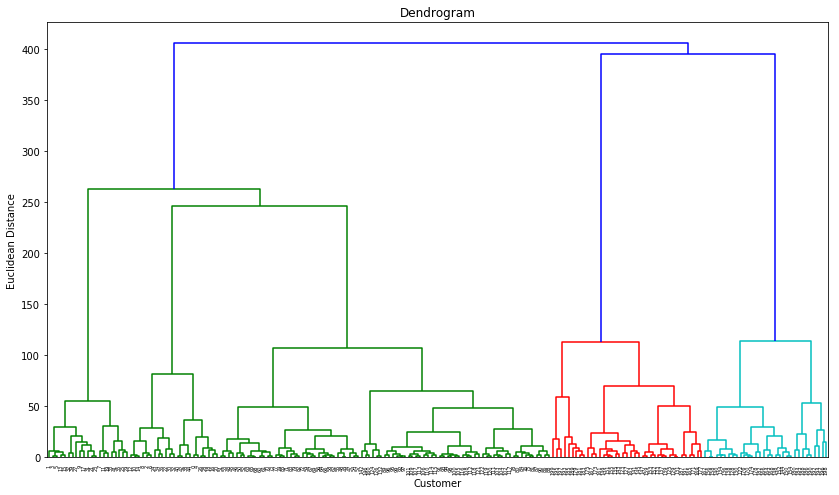

In [4]:
dendrogram = sch.dendrogram(sch.linkage(X, 'ward'))
# ward is used to minimize the variance within each clusters
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')

***

**From the above dendrogram we can see that the maximum length verticle line whcih does not have any horizontal line is the one providing the number of clusters as 5.**

***

### Fitting Hierarchical Clustering to the dataset

In [5]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# It is worth noting that by default the affinity = 'euclidean' and linkage = 'ward' 
y_hc = hc.fit_predict(X)

### Visualising the clusters

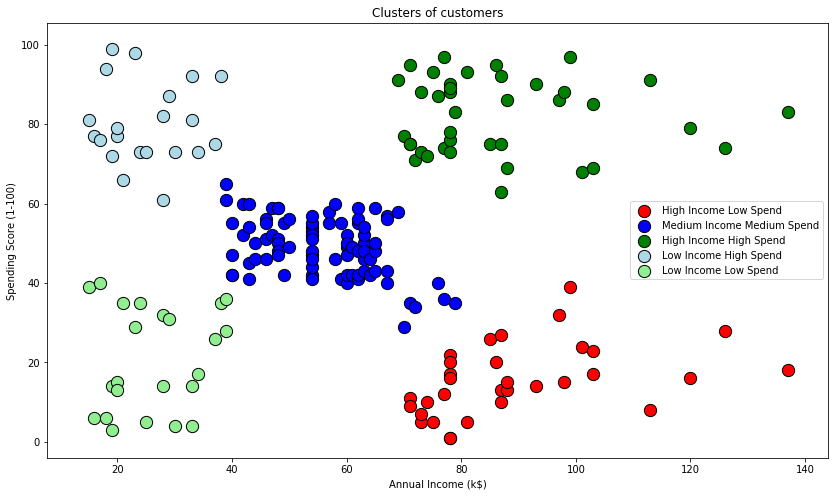

In [6]:
plt.scatter(X[y_hc == 0, 0], 
            X[y_hc == 0, 1], 
            s = 150, c = 'red', 
            label = 'High Income Low Spend', 
            edgecolors = 'black')
plt.scatter(X[y_hc == 1, 0], 
            X[y_hc == 1, 1], 
            s = 150, 
            c = 'blue', 
            label = 'Medium Income Medium Spend', 
            edgecolors = 'black')
plt.scatter(X[y_hc == 2, 0], 
            X[y_hc == 2, 1], 
            s = 150, 
            c = 'green', 
            label = 'High Income High Spend', 
            edgecolors = 'black')
plt.scatter(X[y_hc == 3, 0], 
            X[y_hc == 3, 1], 
            s = 150, 
            c = 'lightblue', 
            label = 'Low Income High Spend', 
            edgecolors = 'black')
plt.scatter(X[y_hc == 4, 0], 
            X[y_hc == 4, 1], 
            s = 150, 
            c = 'lightgreen', 
            label = 'Low Income Low Spend', 
            edgecolors = 'black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***

**The target customers should be the one with High Income and High Spend.**

***